<a href="https://colab.research.google.com/github/elsy-torres/script/blob/main/prueba_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TRANSFORMADA DE UN SISMOGRAMA
## Los datos fueron proporcionados por el Dr. Chang 2020.

#Importar librerías

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import signal
from scipy import fftpack

# Cargar datos de un txt


In [94]:
data=pd.read_csv('NZ007.txt',names=['time','amp'],skiprows=3,sep='\s+',engine='python')
data.head(10)

,time,amp
0,0.00,-0.244690
1,0.02,0.055570
2,0.04,0.034080
3,0.06,-0.035078
4,0.08,0.065622
5,0.10,0.045962
6,0.12,0.007326
7,0.14,-0.012271
8,0.16,-0.046718
9,0.18,-0.049188


In [95]:
data.tail()


,time,amp
16443,328.86,0.72716
16444,328.88,0.61736
16445,328.90,0.54991
16446,328.92,0.59976
16447,328.94,0.41080


In [96]:
print(len(data))

16448


In [40]:
1/328.94

0.0030400680975253844

In [ ]:
data.info()

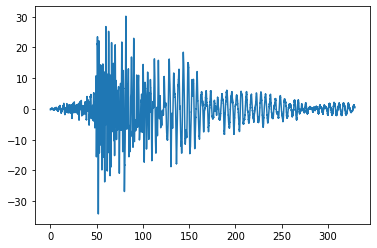

In [97]:
plt.plot(data['time'],data['amp'])

# Declarar el vector x en el dominio de la frecuencia

In [99]:
fo=1/328.94

data['freq']=np.arange(0,len(data)*fo,step=fo)
data['W']=2*np.pi*data['freq']
print(data)

         time       amp      freq           W
0        0.00 -0.244690   0.00000    0.000000
1        0.02  0.055570   0.00304    0.019101
2        0.04  0.034080   0.00608    0.038203
3        0.06 -0.035078   0.00912    0.057304
4        0.08  0.065622   0.01216    0.076405
...       ...       ...       ...         ...
16443  328.86  0.727160  49.98784  314.082860
16444  328.88  0.617360  49.99088  314.101961
16445  328.90  0.549910  49.99392  314.121063
16446  328.92  0.599760  49.99696  314.140164
16447  328.94  0.410800  50.00000  314.159265

[16448 rows x 4 columns]


In [100]:
data.tail()

,time,amp,freq,W
16443,328.86,0.72716,49.98784,314.082860
16444,328.88,0.61736,49.99088,314.101961
16445,328.90,0.54991,49.99392,314.121063
16446,328.92,0.59976,49.99696,314.140164
16447,328.94,0.41080,50.00000,314.159265


# Aplicar un filtro a la serie de tiempo antes de realizar la FT


In [ ]:
data=data.drop('filtro1',axis=1)

In [101]:
data['filtro']=1
data

,time,amp,freq,W,filtro
0,0.00,-0.244690,0.00000,0.000000,1
1,0.02,0.055570,0.00304,0.019101,1
2,0.04,0.034080,0.00608,0.038203,1
3,0.06,-0.035078,0.00912,0.057304,1
4,0.08,0.065622,0.01216,0.076405,1
...,...,...,...,...,...
16443,328.86,0.727160,49.98784,314.082860,1
16444,328.88,0.617360,49.99088,314.101961,1
16445,328.90,0.549910,49.99392,314.121063,1
16446,328.92,0.599760,49.99696,314.140164,1


In [102]:
data['filtro'].iloc[data.index<1000]=signal.cosine(1000)
data['filtro'].iloc[data.index>15447]=signal.cosine(1000)
data.tail()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,time,amp,freq,W,filtro
16443,328.86,0.72716,49.98784,314.082860,0.014137
16444,328.88,0.61736,49.99088,314.101961,0.010995
16445,328.90,0.54991,49.99392,314.121063,0.007854
16446,328.92,0.59976,49.99696,314.140164,0.004712
16447,328.94,0.41080,50.00000,314.159265,0.001571


In [104]:
data['signal_filter']= data['filtro']*data['amp']
data.tail()

,time,amp,freq,W,filtro,signal_filter
16443,328.86,0.72716,49.98784,314.082860,0.014137,0.010280
16444,328.88,0.61736,49.99088,314.101961,0.010995,0.006788
16445,328.90,0.54991,49.99392,314.121063,0.007854,0.004319
16446,328.92,0.59976,49.99696,314.140164,0.004712,0.002826
16447,328.94,0.41080,50.00000,314.159265,0.001571,0.000645


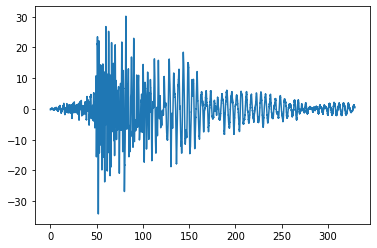

In [105]:
plt.plot(data['time'],data['amp'])

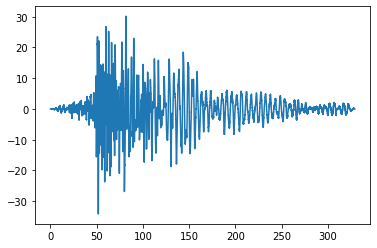

In [106]:
plt.plot(data['time'],data['signal_filter'])

# Realizar FT

In [108]:
data['fft']=fftpack.fft(data['signal_filter'])
data.head(5)

AttributeError: ignored

# Calcular la amplitud de la TF

In [ ]:
data['asb']= np.abs(data['fft'])
data.head(5)

# Calcular la fase de la TF

In [ ]:
data['fase'].iloc[0]=0

In [ ]:
data['fase']=np.arctan(data['fft'].values.imag/data['fft'].values.real)
data.head(5)

In [ ]:
data.tail()

# Señal en el dominio del tiempo

In [ ]:
plt.plot(data['time'],data['amp'])

# Señal en el dominio de la frecuencia 

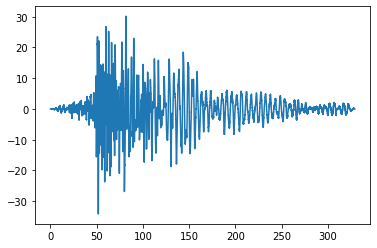

In [83]:
plt.plot(data['time'],data['signal_filter'].values.real)

# Espectro de Amplitud

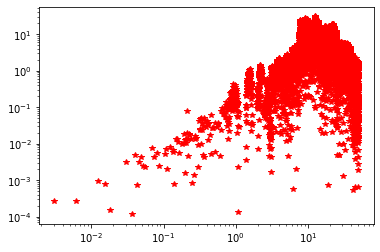

In [92]:
plt.loglog(data['freq'],data['signal_filter'].values.real, 'r*')

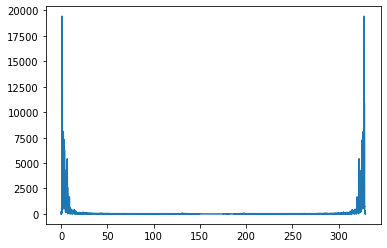

In [81]:
plt.plot(data['time'],data['asb'])

# Espectro de Fase

In [ ]:
plt.loglog(data['freq'],data['fase'],'r*')

In [ ]:
plt.loglog(data['time'],data['fase'])